In [ ]:
import pandas as pd

# Load the datasets
bike_df = pd.read_csv('2-wheeler-EV-bikewale.csv')
car_dekho_df = pd.read_csv('4-wheeler-EV-cardekho.csv')
car_wale_df = pd.read_csv('4-wheeler-EV-carwale.csv')

# Print columns to identify the correct names
print("bike_df columns:", bike_df.columns)
print("car_dekho_df columns:", car_dekho_df.columns)
print("car_wale_df columns:", car_wale_df.columns)


bike_df columns: Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name'],
      dtype='object')
car_dekho_df columns: Index(['Review', 'Rating', 'Attributes Mentioned', 'Model'], dtype='object')
car_wale_df columns: Index(['review', 'Exterior', 'Comfort', 'Performance', 'Fuel Economy',
       'Value for Money', 'Condition', 'driven', 'rating', 'model_name'],
      dtype='object')


In [ ]:
# Example of renaming columns if necessary
bike_df.rename(columns={'price': 'Price'}, inplace=True)
car_dekho_df.rename(columns={'cost': 'Price'}, inplace=True)
car_wale_df.rename(columns={'amount': 'Price'}, inplace=True)


In [ ]:
def clean_price(price):
    """Remove non-numeric characters from price and convert to float"""
    try:
        return float(price.replace('₹', '').replace(',', '').strip())
    except (AttributeError, ValueError):
        return 0.0

# Applying the cleaning function with a safeguard
if 'Price' in bike_df.columns:
    bike_df['Price'] = bike_df['Price'].apply(clean_price)
if 'Price' in car_dekho_df.columns:
    car_dekho_df['Price'] = car_dekho_df['Price'].apply(clean_price)
if 'Price' in car_wale_df.columns:
    car_wale_df['Price'] = car_wale_df['Price'].apply(clean_price)


In [ ]:
# Display the first few rows to verify
print(bike_df.head())
print(car_dekho_df.head())
print(car_wale_df.head())


                                              review    Used it for  \
0  We all checked the bike's capacity to be 150 k...  Daily Commute   
1  Performance is very poor on this bike. The cha...     Everything   
2  I purchased this in April 2022 and the sales s...  Daily Commute   
3  If any issues come in scooty parts not availab...  Daily Commute   
4  Don't buy this vehicle unless you have a near ...  Daily Commute   

       Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0    Never owned             NaN       1            3.0          4.0   
1         > 1 yr      < 5000 kms       1            3.0          1.0   
2     < 3 months      < 5000 kms       3            4.0          4.0   
3  6 months-1 yr  5000-10000 kms       1            1.0          1.0   
4  6 months-1 yr      < 5000 kms       1            3.0          4.0   

   Performance  Service Experience  Extra Features  Comfort  Maintenance cost  \
0          NaN                 NaN             NaN      4.0

In [ ]:
# Apply cleaning function if 'Price' column exists
if 'Price' in bike_df.columns:
    bike_df['Price'] = bike_df['Price'].apply(clean_price)
if 'Price' in car_dekho_df.columns:
    car_dekho_df['Price'] = car_dekho_df['Price'].apply(clean_price)
if 'Price' in car_wale_df.columns:
    car_wale_df['Price'] = car_wale_df['Price'].apply(clean_price)

In [ ]:
# Convert 'Range' column from string to numeric
def clean_range(range_value):
    """Convert range from string to numeric, handling any 'up to' or other text"""
    try:
        return int(range_value.split()[0].replace('km', '').strip())
    except (AttributeError, ValueError):
        return 0

In [ ]:
# Merge datasets
merged_df = pd.concat([bike_df, car_dekho_df, car_wale_df], ignore_index=True)

In [ ]:

# Apply range cleaning
if 'Range' in merged_df.columns:
    merged_df['Range'] = merged_df['Range'].apply(clean_range)

In [ ]:
# Save the processed data to new CSV files
bike_df.to_csv('processed_2-wheeler-EV-bikewale.csv', index=False)
car_dekho_df.to_csv('processed_4-wheeler-EV-cardekho.csv', index=False)
car_wale_df.to_csv('processed_4-wheeler-EV-carwale.csv', index=False)
merged_df.to_csv('processed_merged_EV_data.csv', index=False)

print("Datasets have been processed and saved.")

Datasets have been processed and saved.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
merged_df = pd.read_csv('processed_merged_EV_data.csv')




In [ ]:
print(merged_df.dtypes)


review                   object
Used it for              object
Owned for                object
Ridden for               object
rating                  float64
Visual Appeal           float64
Reliability             float64
Performance             float64
Service Experience      float64
Extra Features          float64
Comfort                 float64
Maintenance cost        float64
Value for Money         float64
Model Name               object
Review                   object
Rating                  float64
Attributes Mentioned     object
Model                    object
Exterior                float64
Fuel Economy            float64
Condition                object
driven                   object
model_name               object
dtype: object


In [ ]:
numeric_columns = merged_df.select_dtypes(include=['number']).columns
corr_matrix = merged_df[numeric_columns].corr()


In [ ]:
# Print the column names to identify the available columns
print("Column names:", merged_df.columns)


Column names: Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name', 'Review', 'Rating', 'Attributes Mentioned', 'Model',
       'Exterior', 'Fuel Economy', 'Condition', 'driven', 'model_name'],
      dtype='object')


In [ ]:
# Remove 'Price' and 'Range' columns if they exist
merged_df = merged_df.drop(columns=['Price', 'Range'], errors='ignore')

# Print the first few rows to understand the updated structure of the DataFrame
print(merged_df.head())

                                              review    Used it for  \
0  We all checked the bike's capacity to be 150 k...  Daily Commute   
1  Performance is very poor on this bike. The cha...     Everything   
2  I purchased this in April 2022 and the sales s...  Daily Commute   
3  If any issues come in scooty parts not availab...  Daily Commute   
4  Don't buy this vehicle unless you have a near ...  Daily Commute   

       Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0    Never owned             NaN     1.0            3.0          4.0   
1         > 1 yr      < 5000 kms     1.0            3.0          1.0   
2     < 3 months      < 5000 kms     3.0            4.0          4.0   
3  6 months-1 yr  5000-10000 kms     1.0            1.0          1.0   
4  6 months-1 yr      < 5000 kms     1.0            3.0          4.0   

   Performance  Service Experience  Extra Features  ...  Model Name  Review  \
0          NaN                 NaN             NaN  ...   TVS

In [ ]:
# 1. Descriptive Statistics for remaining columns
print("Summary Statistics:")
print(merged_df.describe())

Summary Statistics:
           rating  Visual Appeal  Reliability  Performance  \
count  973.000000     739.000000   716.000000   474.000000   
mean     3.493320       3.779432     3.314246     3.770042   
std      1.685452       1.350021     1.585024     1.472751   
min      0.000000       1.000000     1.000000     0.000000   
25%      1.000000       3.000000     2.000000     3.000000   
50%      4.000000       4.000000     4.000000     4.000000   
75%      5.000000       5.000000     5.000000     5.000000   
max      5.000000       5.000000     5.000000     5.000000   

       Service Experience  Extra Features     Comfort  Maintenance cost  \
count          703.000000      185.000000  659.000000        180.000000   
mean             3.145092        2.935135    3.811836          3.394444   
std              1.637871        1.630587    1.358676          1.392306   
min              1.000000        1.000000    0.000000          1.000000   
25%              1.000000        1.000000    3

In [ ]:
# 2. Comparative Analysis: Average by Brand (only applicable columns)
# Ensure 'Brand' column is still present for grouping
if 'Brand' in merged_df.columns:
    avg_stats_by_brand = merged_df.groupby('Brand').mean()
    print("Average statistics by Brand:")
    print(avg_stats_by_brand)

Correlation matrix:
                      rating  Visual Appeal  Reliability  Performance  \
rating              1.000000       0.766609     0.892309     0.853689   
Visual Appeal       0.766609       1.000000     0.776160     0.781042   
Reliability         0.892309       0.776160     1.000000     0.855463   
Performance         0.853689       0.781042     0.855463     1.000000   
Service Experience  0.874777       0.738868     0.861297     0.813284   
Extra Features      0.877789       0.747919     0.823643     0.836139   
Comfort             0.810268       0.785004     0.810912     0.830760   
Maintenance cost    0.690527       0.618095     0.711529     0.685040   
Value for Money     0.848039       0.739205     0.824377     0.813931   
Rating                   NaN            NaN          NaN          NaN   
Exterior            0.622239            NaN          NaN     0.795318   
Fuel Economy        0.578896            NaN          NaN     0.800712   

                    Service Ex

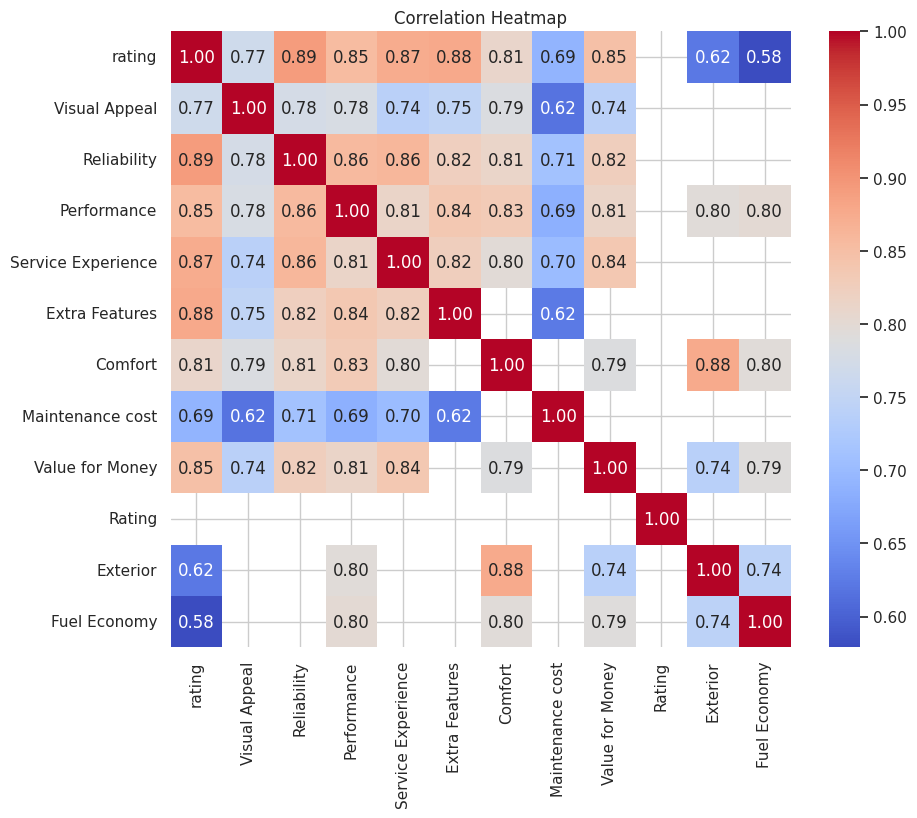

In [ ]:
# 3. Correlation Analysis
# Filter only numeric columns for correlation analysis
numeric_columns = merged_df.select_dtypes(include=['number']).columns
if len(numeric_columns) > 0:
    corr_matrix = merged_df[numeric_columns].corr()
    print("Correlation matrix:")
    print(corr_matrix)

    # Heatmap of Correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

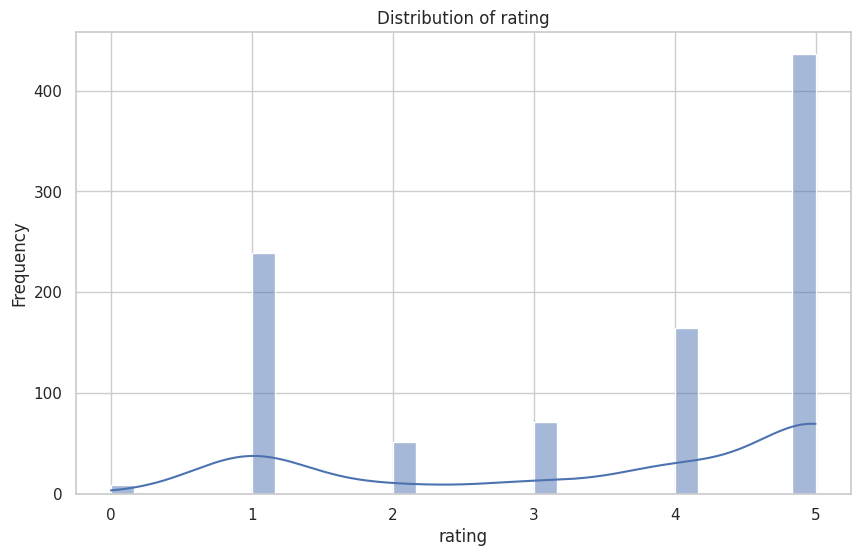

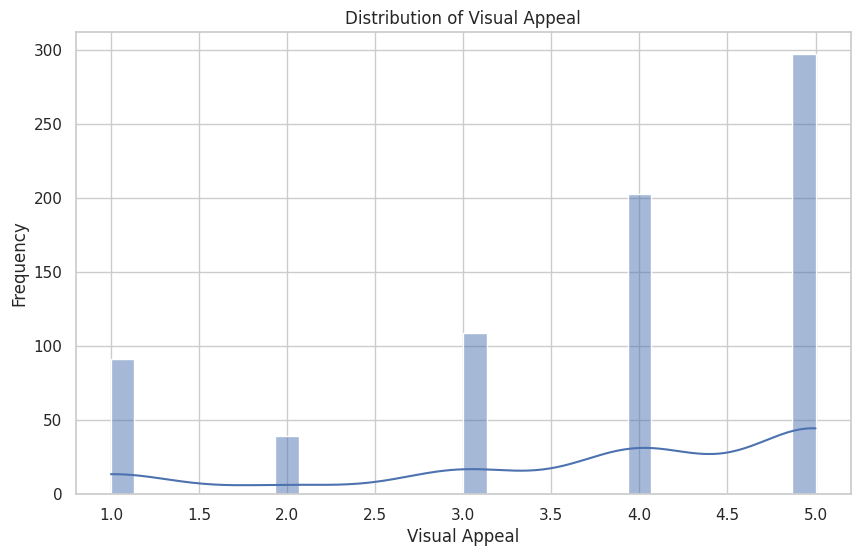

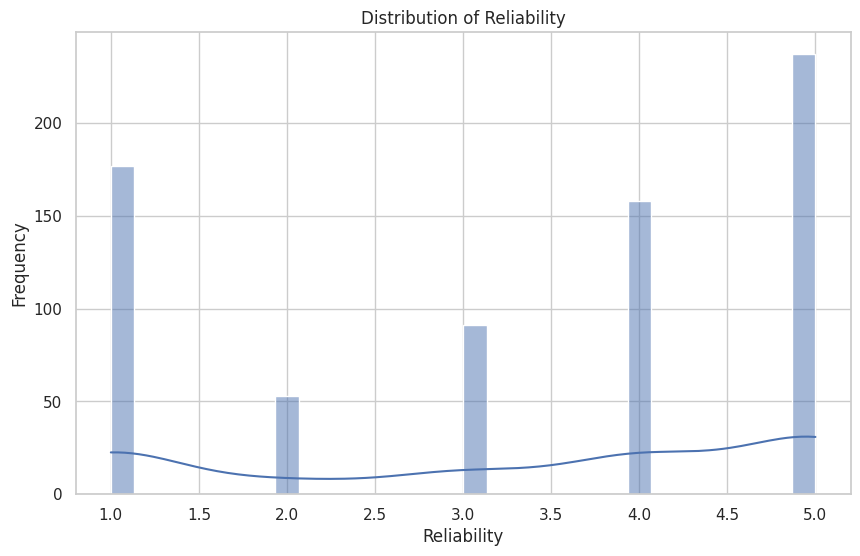

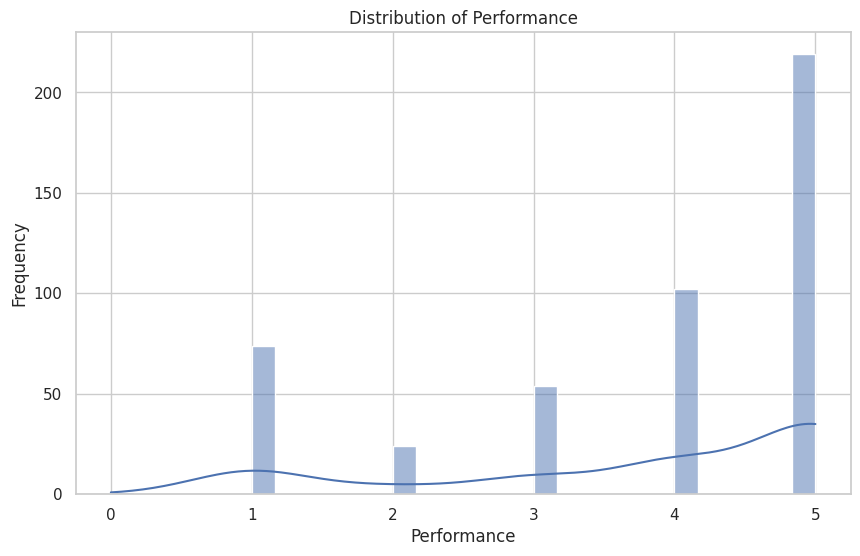

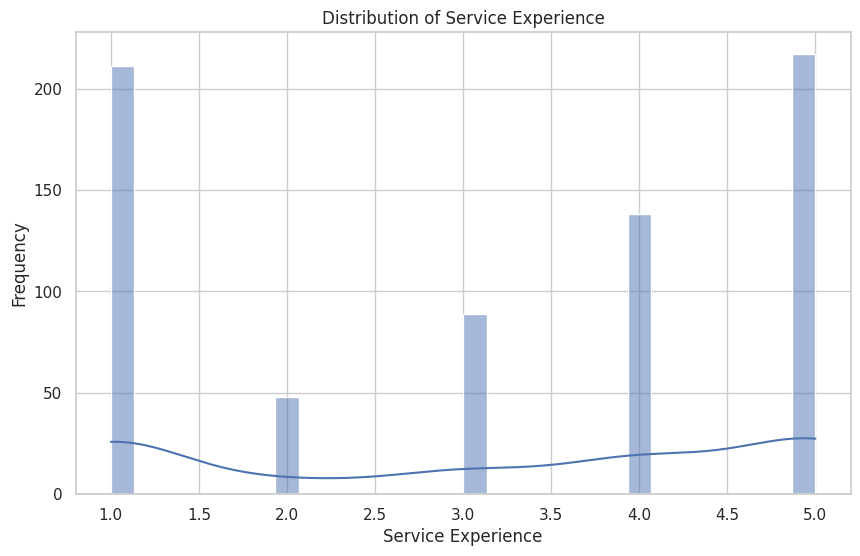

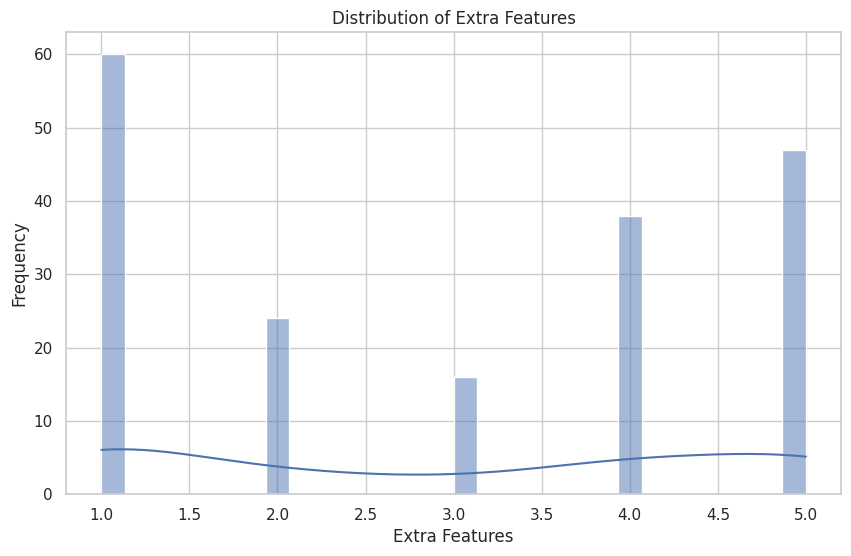

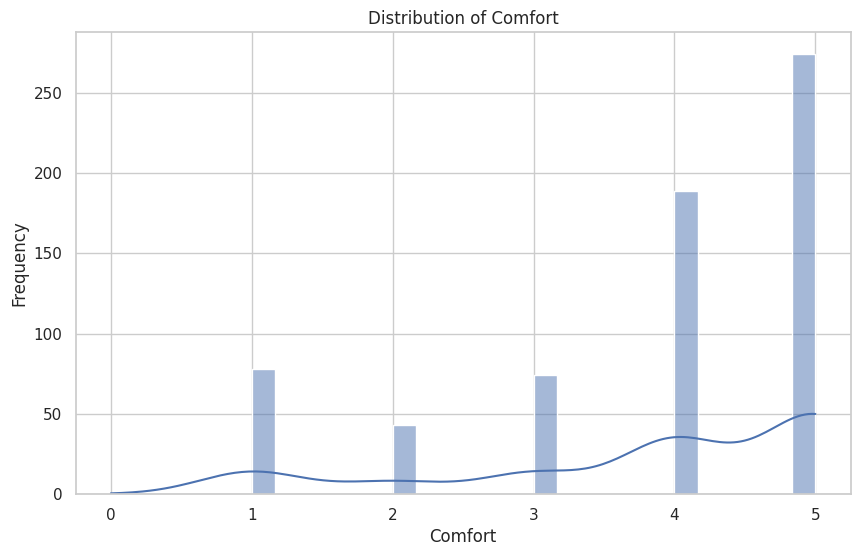

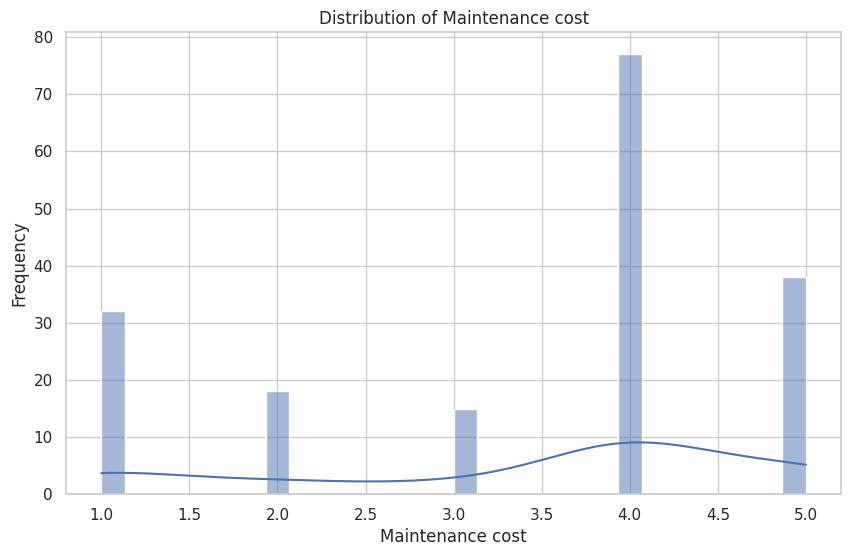

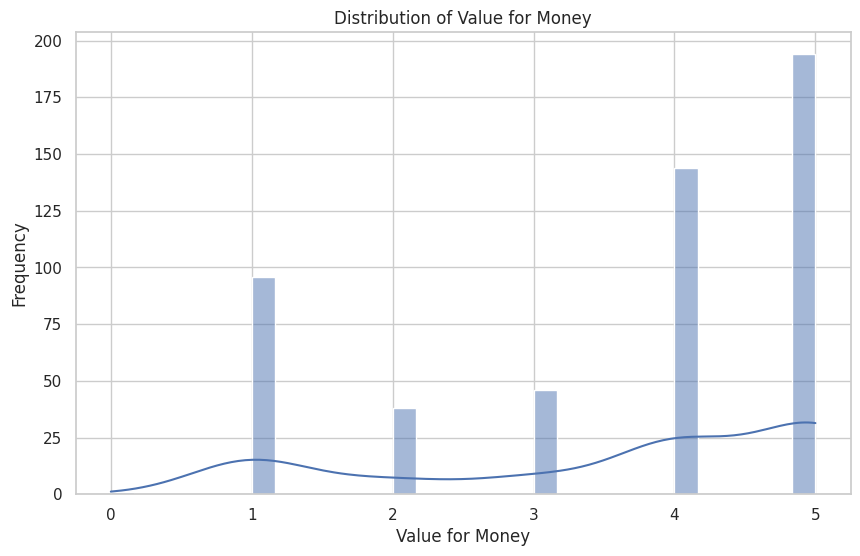

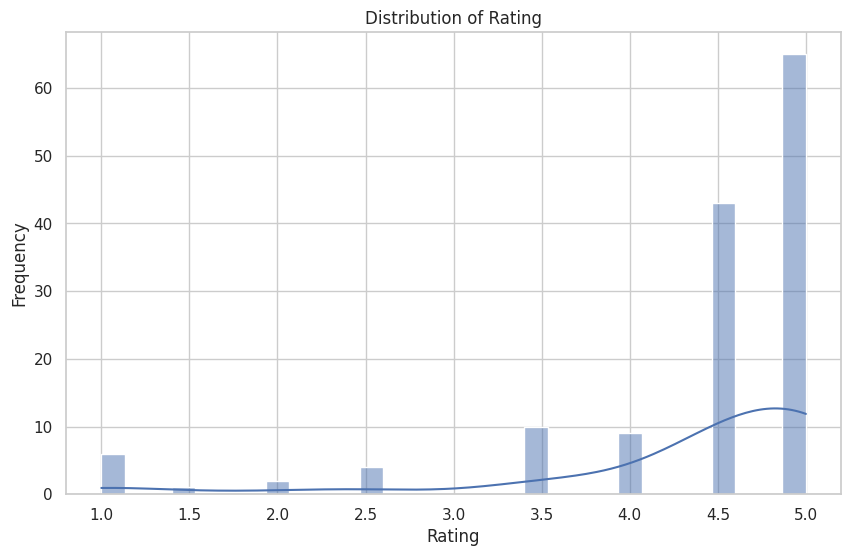

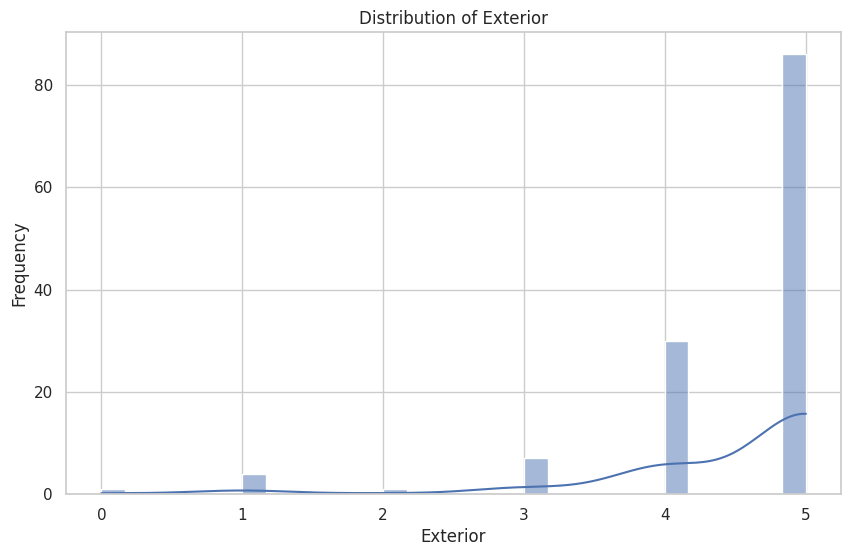

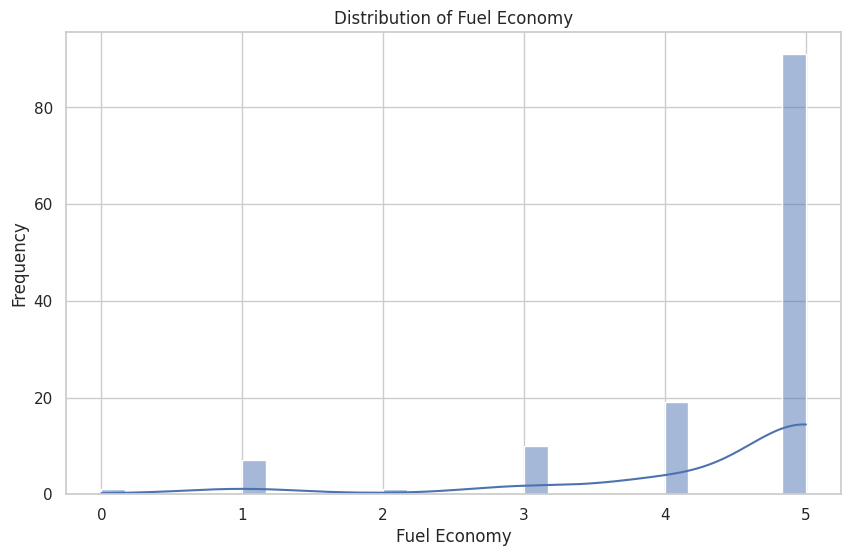

In [ ]:
# Histogram of available numeric columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(merged_df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Set style for the plots
sns.set(style="whitegrid")

In [ ]:
import seaborn as sns

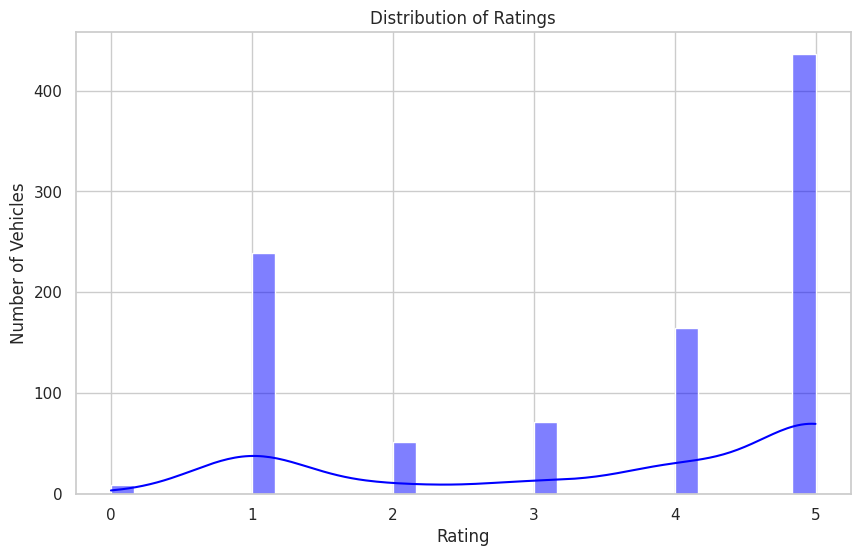

In [ ]:
# Plot for Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Vehicles')
plt.show()

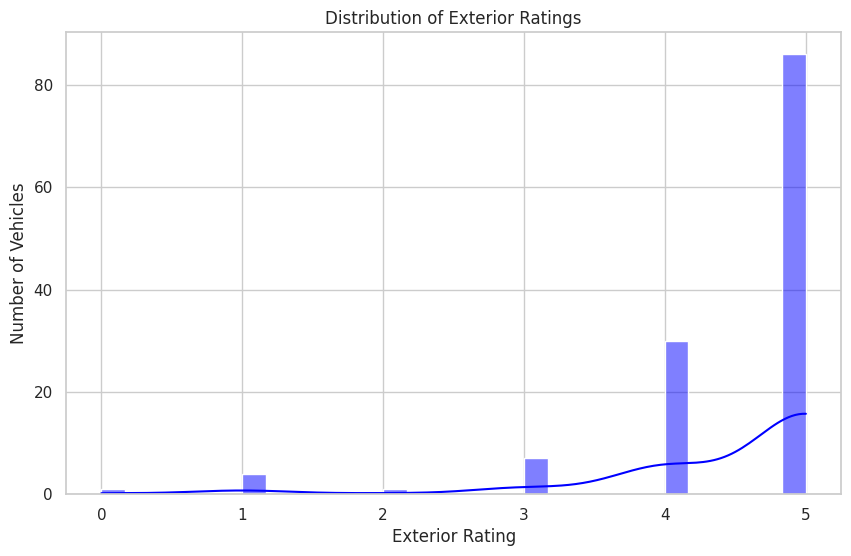

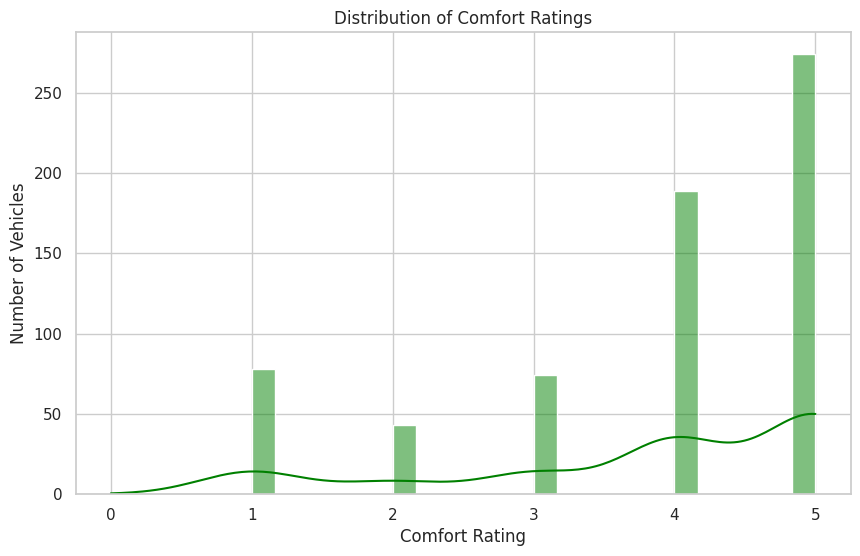

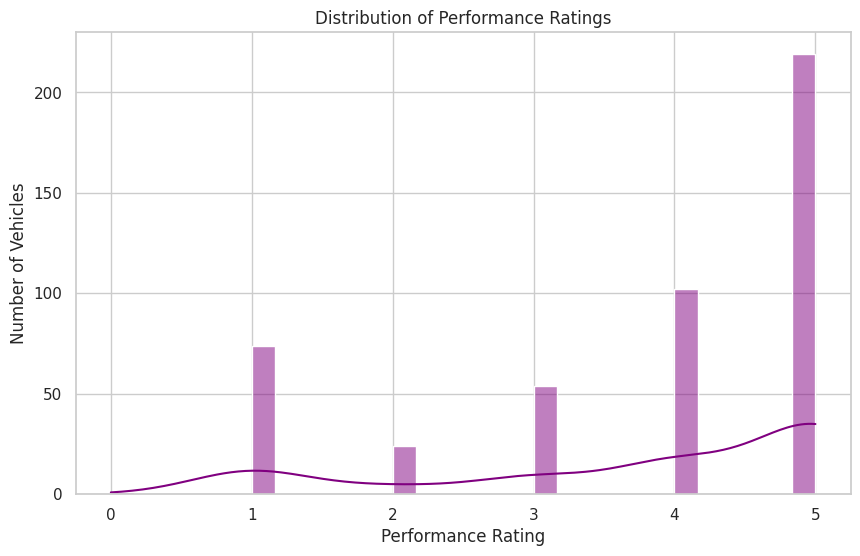

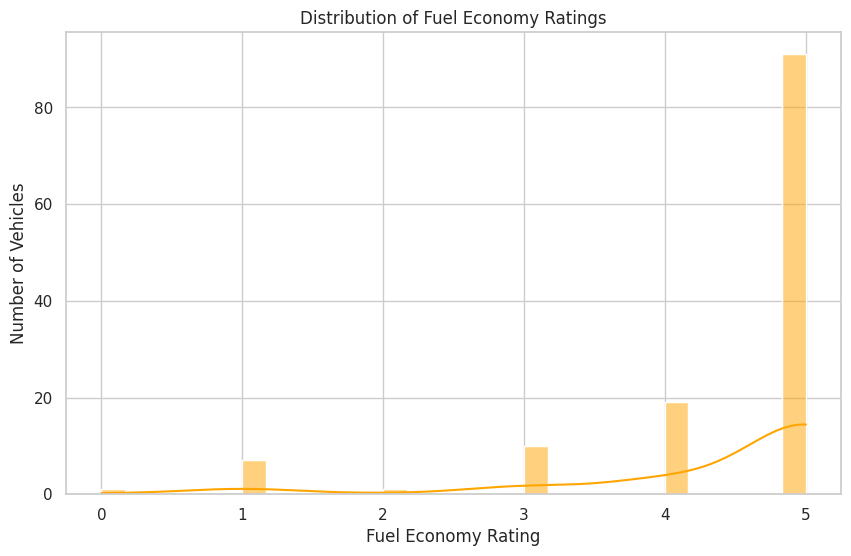

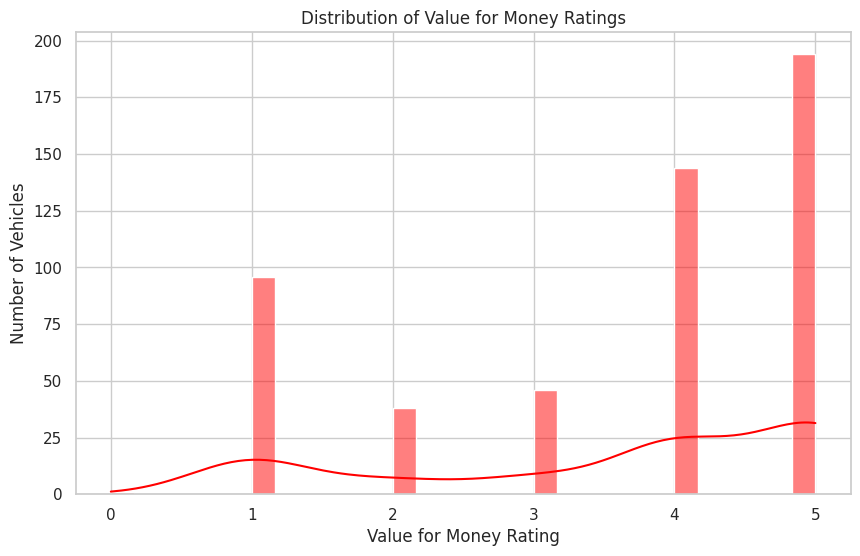

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
merged_df = pd.read_csv('processed_merged_EV_data.csv')

# Set style for the plots
sns.set(style="whitegrid")

# 1. Distribution of Exterior Ratings
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Exterior'], bins=30, kde=True, color='blue')
plt.title('Distribution of Exterior Ratings')
plt.xlabel('Exterior Rating')
plt.ylabel('Number of Vehicles')
plt.show()

# 2. Distribution of Comfort Ratings
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Comfort'], bins=30, kde=True, color='green')
plt.title('Distribution of Comfort Ratings')
plt.xlabel('Comfort Rating')
plt.ylabel('Number of Vehicles')
plt.show()

# 3. Distribution of Performance Ratings
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Performance'], bins=30, kde=True, color='purple')
plt.title('Distribution of Performance Ratings')
plt.xlabel('Performance Rating')
plt.ylabel('Number of Vehicles')
plt.show()

# 4. Distribution of Fuel Economy Ratings
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Fuel Economy'], bins=30, kde=True, color='orange')
plt.title('Distribution of Fuel Economy Ratings')
plt.xlabel('Fuel Economy Rating')
plt.ylabel('Number of Vehicles')
plt.show()

# 5. Distribution of Value for Money Ratings
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Value for Money'], bins=30, kde=True, color='red')
plt.title('Distribution of Value for Money Ratings')
plt.xlabel('Value for Money Rating')
plt.ylabel('Number of Vehicles')
plt.show()




<ipython-input-85-a1eafb827334>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


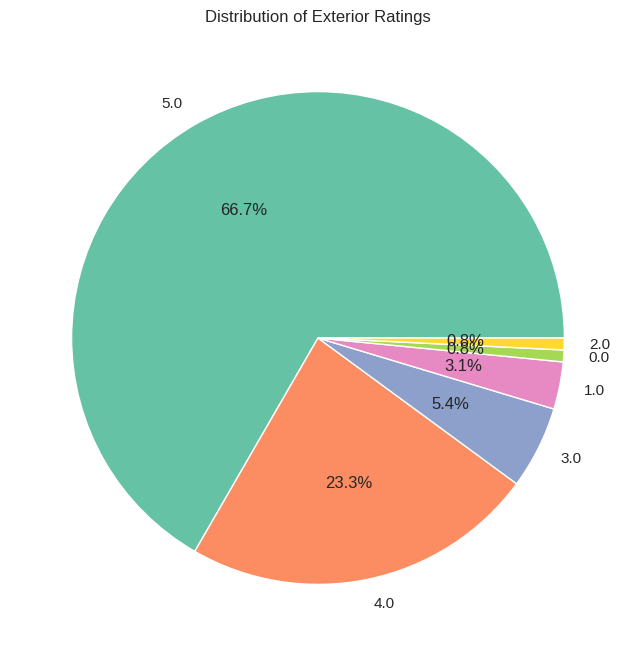

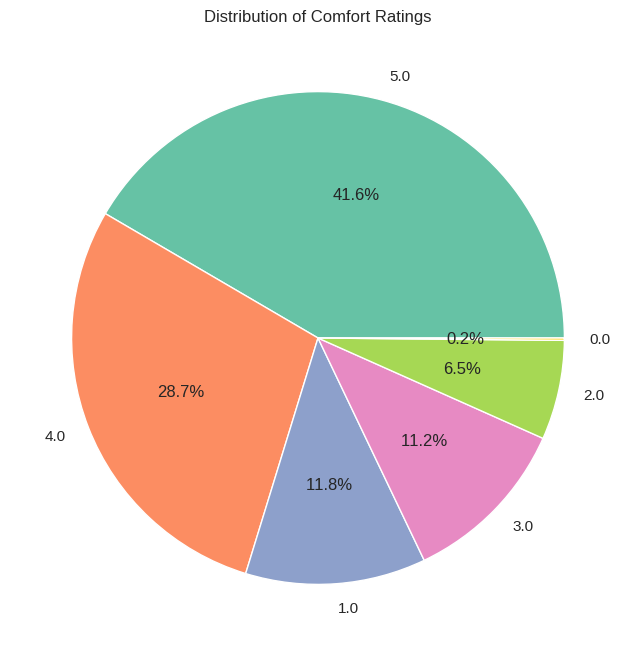

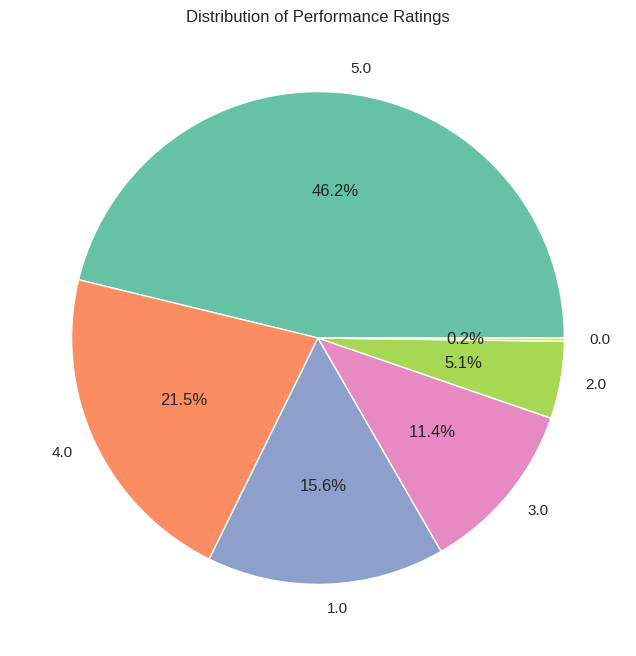

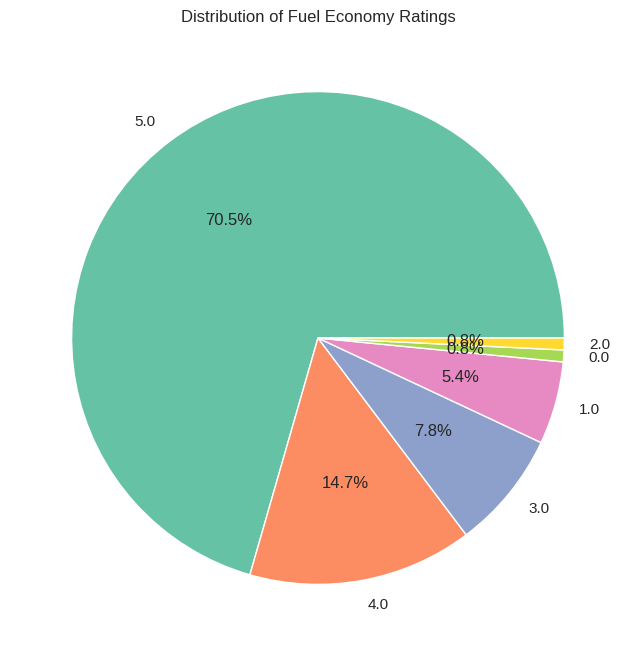

In [ ]:
# Set style for the plots
plt.style.use('seaborn-darkgrid')

# Function to create pie chart for a given feature
def plot_pie_chart(feature, title):
    plt.figure(figsize=(8, 8))
    ratings_counts = merged_df[feature].value_counts()
    plt.pie(ratings_counts, labels=ratings_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', len(ratings_counts)))
    plt.title(title)
    plt.show()

# Example pie charts for each feature
plot_pie_chart('Exterior', 'Distribution of Exterior Ratings')
plot_pie_chart('Comfort', 'Distribution of Comfort Ratings')
plot_pie_chart('Performance', 'Distribution of Performance Ratings')
plot_pie_chart('Fuel Economy', 'Distribution of Fuel Economy Ratings')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
print(merged_df.columns)


Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name', 'Review', 'Rating', 'Attributes Mentioned', 'Model',
       'Exterior', 'Fuel Economy', 'Condition', 'driven', 'model_name'],
      dtype='object')


In [ ]:
print(merged_df.head())


                                              review    Used it for  \
0  We all checked the bike's capacity to be 150 k...  Daily Commute   
1  Performance is very poor on this bike. The cha...     Everything   
2  I purchased this in April 2022 and the sales s...  Daily Commute   
3  If any issues come in scooty parts not availab...  Daily Commute   
4  Don't buy this vehicle unless you have a near ...  Daily Commute   

       Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0    Never owned             NaN     1.0            3.0          4.0   
1         > 1 yr      < 5000 kms     1.0            3.0          1.0   
2     < 3 months      < 5000 kms     3.0            4.0          4.0   
3  6 months-1 yr  5000-10000 kms     1.0            1.0          1.0   
4  6 months-1 yr      < 5000 kms     1.0            3.0          4.0   

   Performance  Service Experience  Extra Features  ...  Model Name  Review  \
0          NaN                 NaN             NaN  ...   TVS

In [ ]:
merged_df.rename(columns={'old_name_for_Brand': 'Brand', 'old_name_for_Price': 'Price'}, inplace=True)


In [ ]:
# Rename columns if necessary
merged_df.rename(columns=lambda x: x.strip().capitalize(), inplace=True)
print(merged_df.columns)


Index(['Review', 'Used it for', 'Owned for', 'Ridden for', 'Rating',
       'Visual appeal', 'Reliability', 'Performance', 'Service experience',
       'Extra features', 'Comfort', 'Maintenance cost', 'Value for money',
       'Model name', 'Review', 'Rating', 'Attributes mentioned', 'Model',
       'Exterior', 'Fuel economy', 'Condition', 'Driven', 'Model_name'],
      dtype='object')


In [ ]:
plt.figure(figsize=(10, 6))
if 'Price' in merged_df.columns and merged_df['Price'].dtype in ['float64', 'int64']:
    sns.histplot(merged_df['Price'], bins=30, kde=True, color='teal')
    plt.title('Distribution of EV Prices')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Price column is missing or not numeric.")


Price column is missing or not numeric.


<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd

# Load the dataset
two_wheeler_df = pd.read_csv('2-wheeler-EV-bikewale.csv')


In [ ]:
print("Columns in two_wheeler_df:", two_wheeler_df.columns)


Columns in two_wheeler_df: Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name'],
      dtype='object')


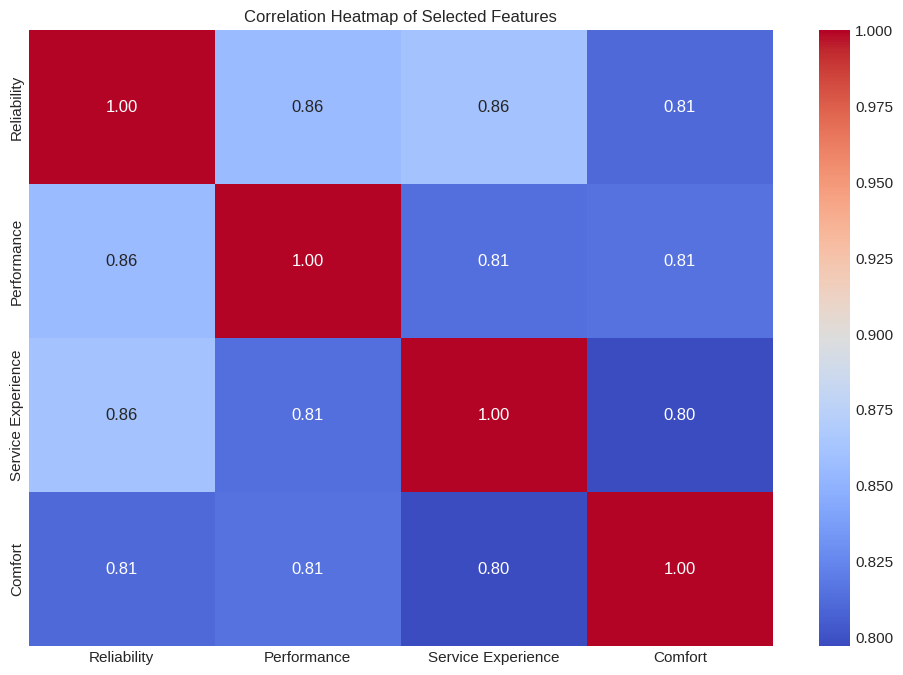

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = two_wheeler_df[['Reliability', 'Performance', 'Service Experience', 'Comfort']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()


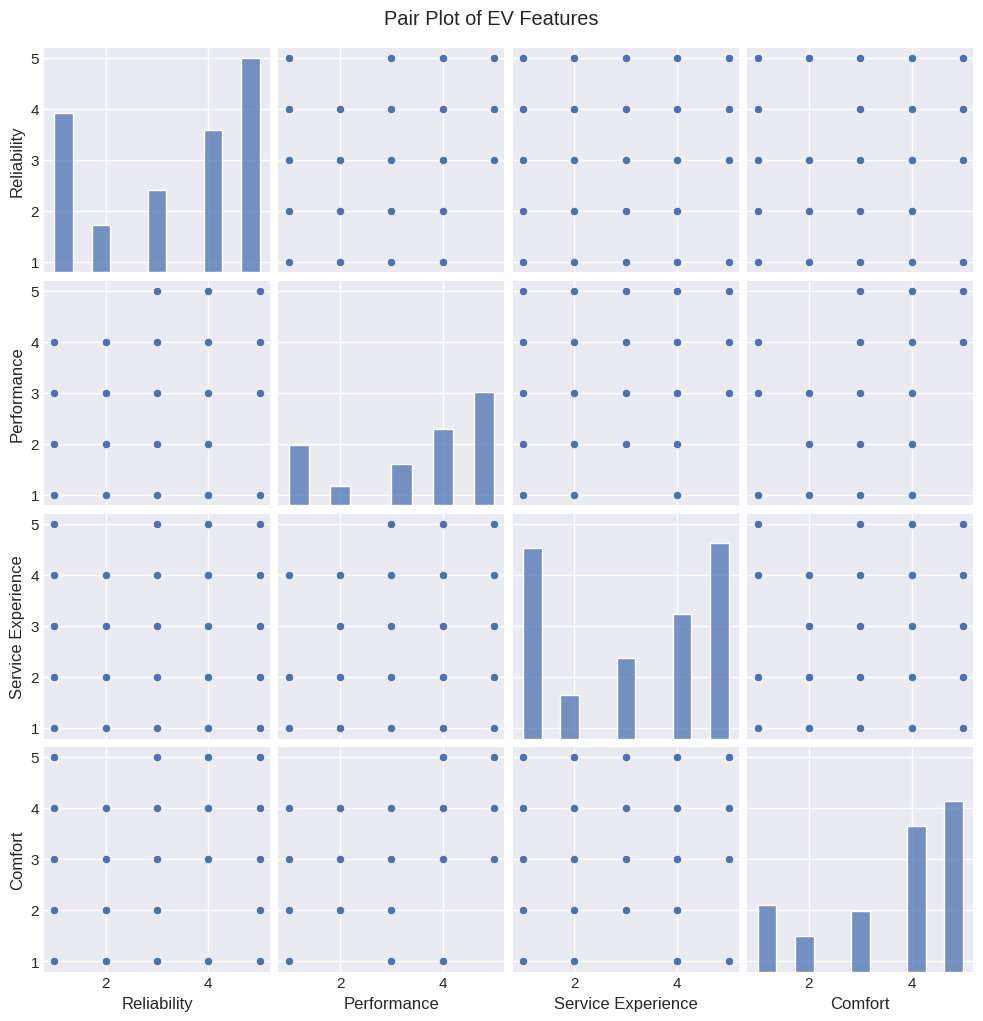

In [ ]:
# Pair Plot
sns.pairplot(two_wheeler_df[['Reliability', 'Performance', 'Service Experience', 'Comfort']])
plt.suptitle('Pair Plot of EV Features', y=1.02)
plt.show()


<ipython-input-104-b57622bb4ce9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=two_wheeler_df, y='Reliability', palette='pastel')


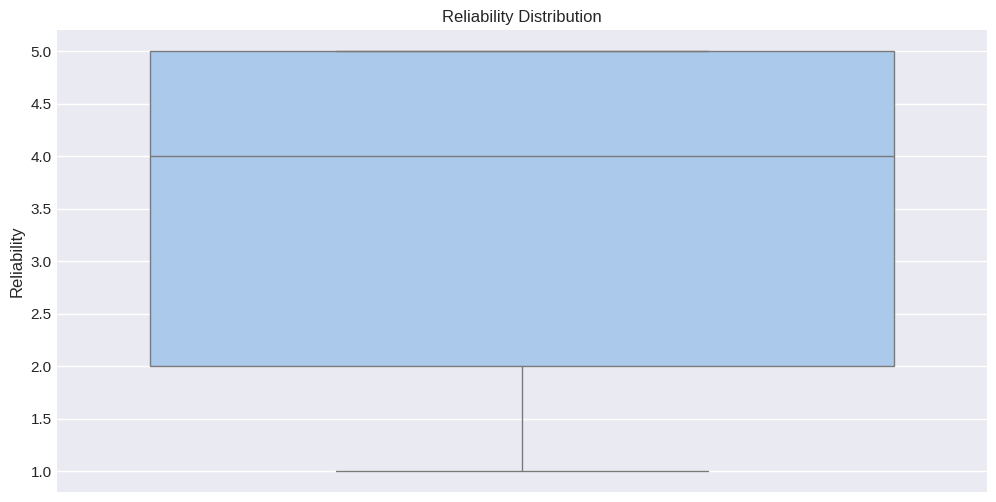

<ipython-input-104-b57622bb4ce9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=two_wheeler_df, y='Performance', palette='muted')


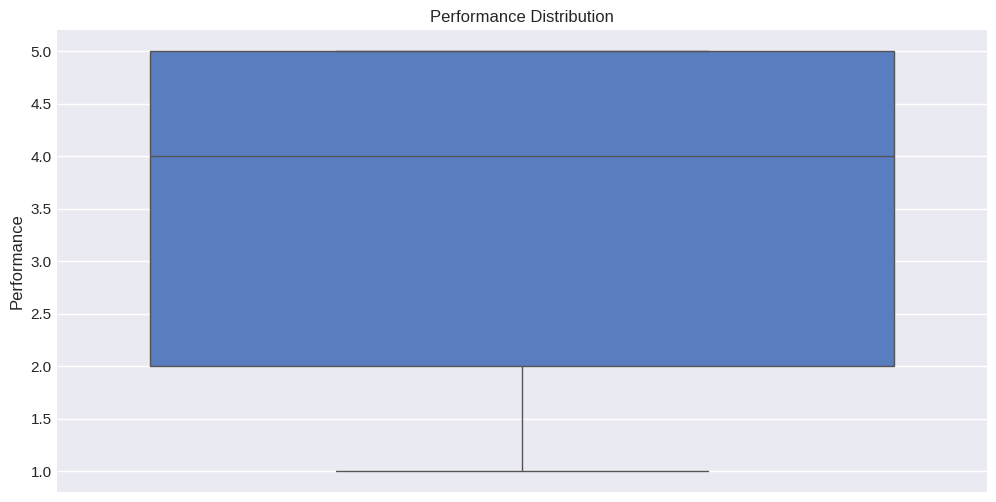

In [ ]:
# Box Plots (if no Segment column)
plt.figure(figsize=(12, 6))
sns.boxplot(data=two_wheeler_df, y='Reliability', palette='pastel')
plt.title('Reliability Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=two_wheeler_df, y='Performance', palette='muted')
plt.title('Performance Distribution')
plt.show()


<ipython-input-105-5ef9cd002b98>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=two_wheeler_df, y='Service Experience', palette='Set3')


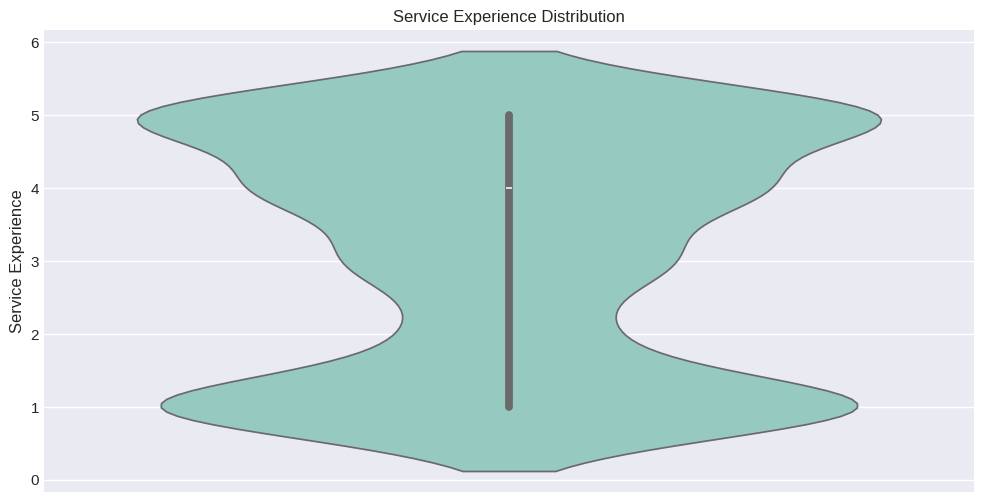

In [ ]:
# Violin Plot (if no Segment column)
plt.figure(figsize=(12, 6))
sns.violinplot(data=two_wheeler_df, y='Service Experience', palette='Set3')
plt.title('Service Experience Distribution')
plt.show()


In [ ]:
# Check for missing values
print(two_wheeler_df[['Reliability', 'Performance', 'Service Experience', 'Comfort']].isna().sum())


Reliability           128
Performance           499
Service Experience    141
Comfort               314
dtype: int64


In [ ]:
# Drop rows with missing values
cleaned_df = two_wheeler_df[['Reliability', 'Performance', 'Service Experience', 'Comfort']].dropna()


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(two_wheeler_df[['Reliability', 'Performance', 'Service Experience', 'Comfort']])


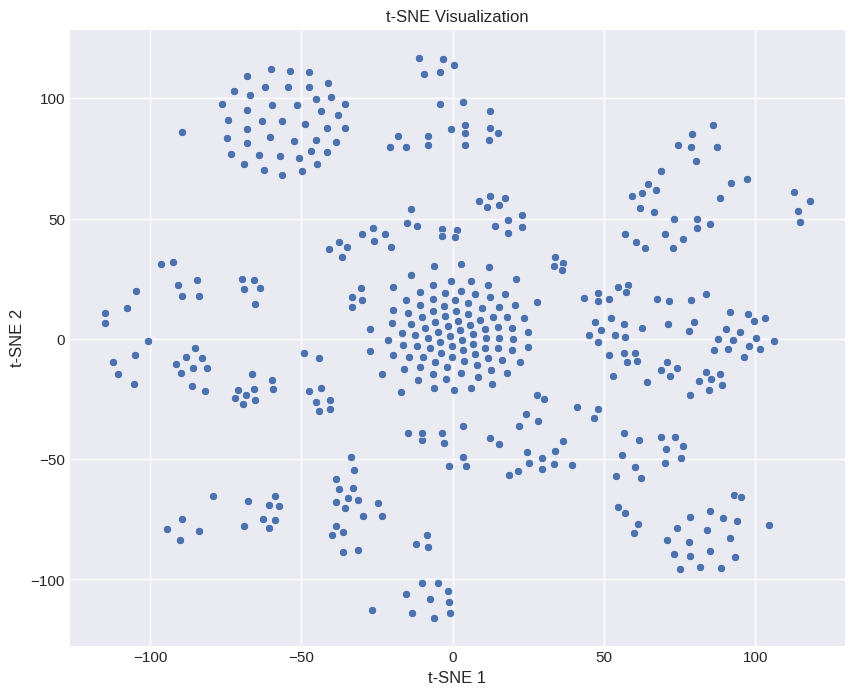

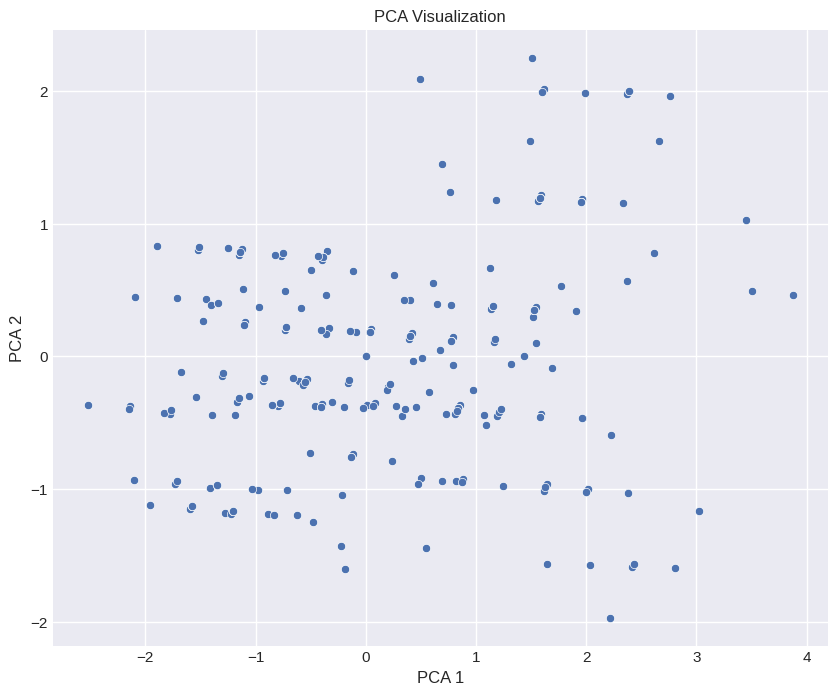

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_features)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_features)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_results[:, 0], y=pca_results[:, 1])
plt.title('PCA Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [ ]:
# Print column names to verify
print(two_wheeler_df.columns)


Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name'],
      dtype='object')


In [ ]:
import numpy as np

# Create a new segmentation column based on a criterion
# Example: Segment based on 'Reliability' scores
# Adjust the criteria as needed
conditions = [
    (two_wheeler_df['Reliability'] > 4),
    (two_wheeler_df['Reliability'] <= 4)
]
choices = ['High Reliability', 'Low Reliability']
two_wheeler_df['Segment'] = np.select(conditions, choices, default='Unknown')


In [ ]:
# Print the unique values in the 'Segment' column to verify
print(two_wheeler_df['Segment'].unique())


['Low Reliability' 'High Reliability' 'Unknown']


<ipython-input-117-99138e1e22c3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=two_wheeler_df, x='Segment', y='Reliability', palette='pastel')


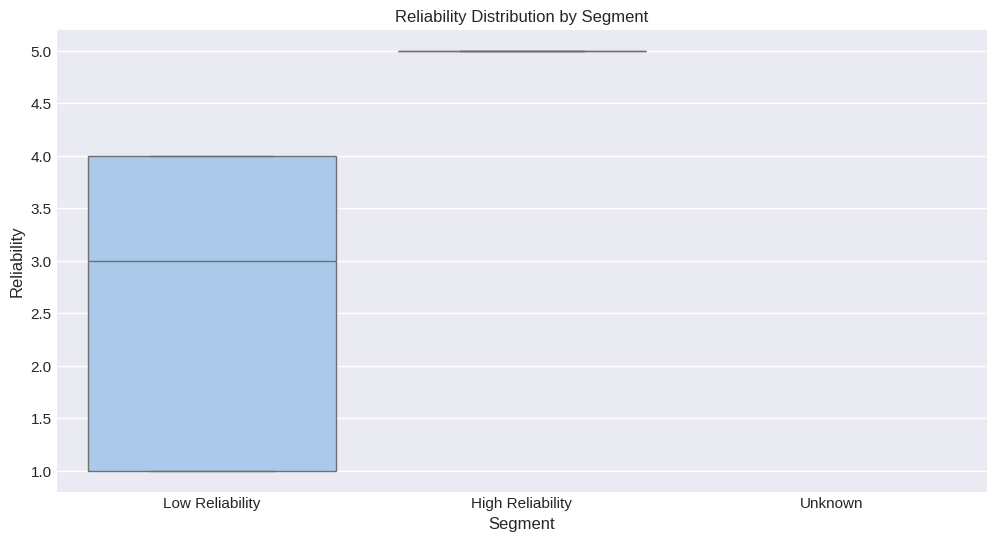

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot for Reliability
plt.figure(figsize=(12, 6))
sns.boxplot(data=two_wheeler_df, x='Segment', y='Reliability', palette='pastel')
plt.title('Reliability Distribution by Segment')
plt.show()


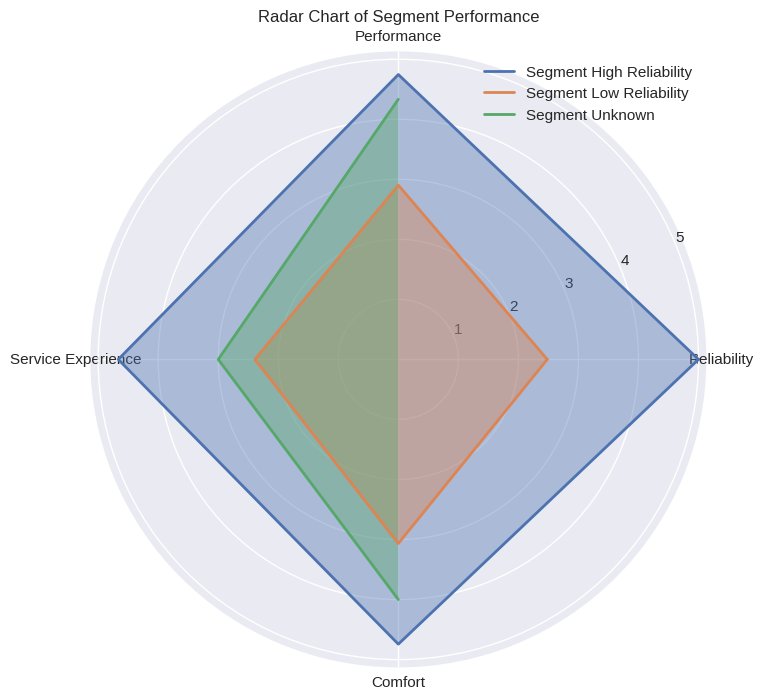

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already created the 'Segment' column
segment_averages = two_wheeler_df.groupby('Segment')[['Reliability', 'Performance', 'Service Experience', 'Comfort']].mean().reset_index()

categories = list(segment_averages.columns[1:])
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for i in range(len(segment_averages)):
    values = segment_averages.iloc[i, 1:].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Segment {segment_averages.iloc[i, 0]}')
    ax.fill(angles, values, alpha=0.4)

plt.title('Radar Chart of Segment Performance')
plt.xticks(angles[:-1], categories)
plt.legend(loc='upper right')
plt.show()


In [ ]:
print(two_wheeler_df.columns)


Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name', 'Segment'],
      dtype='object')


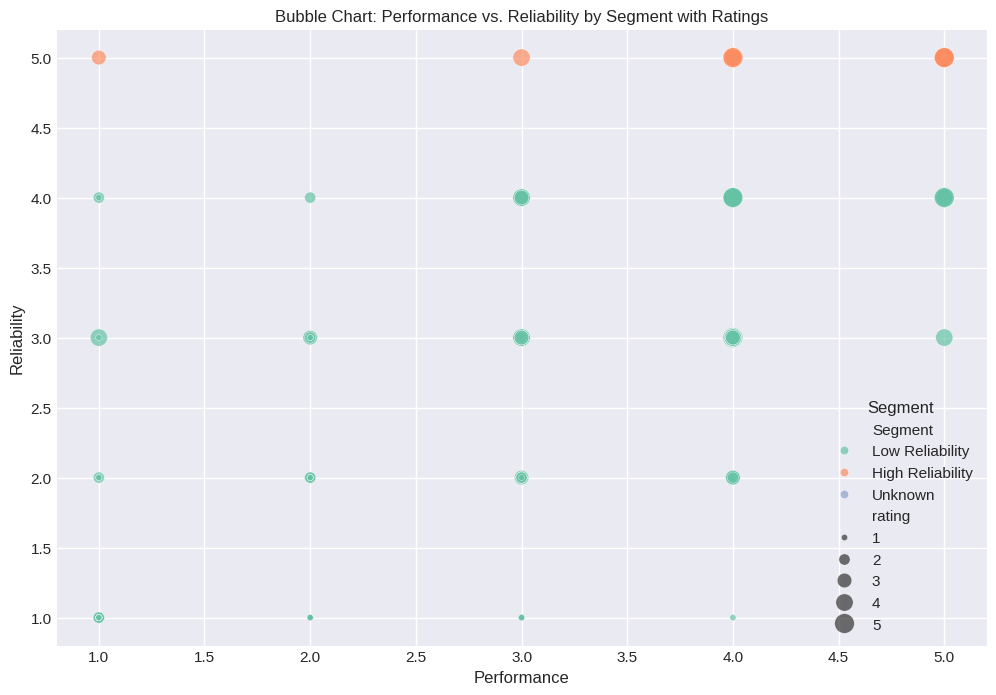

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bubble Chart: Performance vs. Reliability by Segment with Ratings
plt.figure(figsize=(12, 8))
sns.scatterplot(data=two_wheeler_df, x='Performance', y='Reliability', size='rating', hue='Segment', sizes=(20, 200), alpha=0.7, palette='Set2')
plt.title('Bubble Chart: Performance vs. Reliability by Segment with Ratings')
plt.xlabel('Performance')
plt.ylabel('Reliability')
plt.legend(title='Segment')
plt.show()
